In [1]:
# !ls -hl|grep csv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from time import time, ctime

from sklearn.metrics import accuracy_score, classification_report, classification, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, StratifiedShuffleSplit

from helper import plot_confusion_matrix, plot_confusion_matrix2
dim=lambda *x: [i.shape for i in x]

In [2]:
%%time
df = pd.read_csv('./preprocessed.csv')
print df.shape

(49260, 748)
CPU times: user 2.72 s, sys: 266 ms, total: 2.98 s
Wall time: 2.98 s


In [3]:
pd.options.display.max_columns=100
df.head(3)

,username,fname.gender,username_split_predict,last,last_two,first,first2,nchar,vowels.pct,digits.pct,last_is_vowel,first_is_vowel,last_is_digit,first_is_digit,digits.num,upper.pct,first_is_upper,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,...,feature_681,feature_682,feature_683,feature_684,feature_685,feature_686,feature_687,feature_688,feature_689,feature_690,feature_691,feature_692,feature_693,feature_694,feature_695,feature_696,feature_697,feature_698,feature_699,feature_700,feature_701,feature_702,feature_703,feature_704,feature_705,feature_706,feature_707,feature_708,feature_709,feature_710,feature_711,feature_712,feature_713,feature_714,feature_715,feature_716,feature_717,feature_718,feature_719,feature_720,feature_721,feature_722,feature_723,feature_724,feature_725,feature_726,feature_727,feature_728,feature_729,feature_730
0,billion,male,unknow,n,on,b,bi,7,0.428571,0.0,False,False,False,False,0,0,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,14.0,7.0
1,ArmenSoft,male,male,t,ft,A,Ar,9,0.222222,0.0,False,False,False,False,0,2,True,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,9.0
2,okbookman,male,female,n,an,o,ok,9,0.444444,0.0,False,True,False,False,0,0,False,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,9.0


In [4]:
# !ls |grep csv

In [5]:
# df.head()

In [6]:
add=pd.read_csv('./new_golden.csv')
add.shape

(119819, 38)

In [7]:
add.head()

,about.avatar,about.avatar_cdn,about.avatar_large,about.avatar_large_cdn,about.chosen_role,about.company,about.corporate,about.cover_image,about.display_name,about.hourly_rate,about.id,about.location,about.preferred_freelancer,about.primary_currency,about.primary_language,about.profile_description,about.public_name,about.recommendations,about.registration_date,about.registration_date_human,about.reputation,about.role,about.status,about.tagline,about.timezone,about.username,about.username_sentence,hourlyRate,resume.certifications,resume.education,resume.exams,resume.experience,resume.publications,resume.show,skills,timeOffset,userId,username
0,/ppic/1869150/logo/1018449/profile_logo_101844...,//cdn2.f-cdn.com/ppic/1869150/logo/1018449/pro...,/ppic/1869149/logo/1018449/profile-image-250.png,//cdn3.f-cdn.com/ppic/1869149/logo/1018449/pro...,2.0,itsol,None,{u'current_image': {u'url': u'//cdn2.f-cdn.com...,techit99,60,1018449.0,"{u'administrative_area': None, u'city': u'Bris...",False,"{u'code': u'USD', u'name': u'US Dollar', u'cou...",en,NaN,techit99,0.0,1.237934e+09,"March, 2009","{u'user_id': 1018449, u'last3months': {u'compl...",1.0,"{u'payment_verified': False, u'identity_verifi...",NaN,"{u'country': u'UK', u'offset': 1, u'id': 262, ...",techit99,Techit99,60.0,"[{u'award_date': u'2011', u'descr': u'Hootsuit...",[],[],"[{u'year_interval': u'-2011', u'month_interval...",[],True,"[{u'usages': 0, u'seo_url': u'php', u'islocal'...",0.0,1018449.0,techit99
1,/img/unknown.png,//cdn6.f-cdn.com/img/unknown.png,/img/unknown.png,//cdn6.f-cdn.com/img/unknown.png,1.0,Handmade Cards for Animal Charities,None,{u'current_image': {u'url': u'//cdn2.f-cdn.com...,jung14,25,1344962.0,"{u'administrative_area': None, u'city': u'Penr...",False,"{u'code': u'USD', u'name': u'US Dollar', u'cou...",en,NaN,jung14,0.0,1.262802e+09,"January, 2010","{u'user_id': 1344962, u'last3months': {u'compl...",0.0,"{u'payment_verified': False, u'identity_verifi...",NaN,"{u'country': u'UK', u'offset': 1, u'id': 262, ...",jung14,Jung14,25.0,[],[],[],[],[],False,"[{u'usages': 0, u'seo_url': u'copywriting', u'...",0.0,1344962.0,jung14
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/img/unknown.png,//cdn6.f-cdn.com/img/unknown.png,/img/unknown.png,//cdn6.f-cdn.com/img/unknown.png,1.0,Amtech Software,None,{u'current_image': {u'url': u'//cdn2.f-cdn.com...,PatilAmit813,10,1557698.0,"{u'administrative_area': None, u'city': u'Nash...",False,"{u'code': u'USD', u'name': u'US Dollar', u'cou...",en,NaN,PatilAmit813,0.0,1.273486e+09,"May, 2010","{u'user_id': 1557698, u'last3months': {u'compl...",0.0,"{u'payment_verified': False, u'identity_verifi...",NaN,"{u'country': u'IN', u'offset': 5.5, u'id': 403...",PatilAmit813,PatilAmit813,10.0,[],[],[],[],[],False,"[{u'usages': 0, u'seo_url': u'php', u'islocal'...",330.0,1557698.0,patilamit813


In [17]:
len(df['username'].unique())

48157

In [18]:
new = df.set_index('username').join(add.set_index('username'), how='inner').reset_index()
new.shape

(46022, 785)

In [21]:
len(new['username'].unique())

32937

In [ ]:
pd.Series.duplicated

In [15]:
new[new['username'].isnull()]

,username,fname.gender,username_split_predict,last,last_two,first,first2,nchar,vowels.pct,digits.pct,last_is_vowel,first_is_vowel,last_is_digit,first_is_digit,digits.num,upper.pct,first_is_upper,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,...,feature_718,feature_719,feature_720,feature_721,feature_722,feature_723,feature_724,feature_725,feature_726,feature_727,feature_728,feature_729,feature_730,about.avatar,about.avatar_cdn,about.avatar_large,about.avatar_large_cdn,about.chosen_role,about.company,about.corporate,about.cover_image,about.display_name,about.hourly_rate,about.id,about.location,about.preferred_freelancer,about.primary_currency,about.primary_language,about.profile_description,about.public_name,about.recommendations,about.registration_date,about.registration_date_human,about.reputation,about.role,about.status,about.tagline,about.timezone,about.username,about.username_sentence,hourlyRate,resume.certifications,resume.education,resume.exams,resume.experience,resume.publications,resume.show,skills,timeOffset,userId
49891,NaN,male,female,NaN,NaN,NaN,NaN,3,0.333333,0.0,False,False,False,False,0,0,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49892,NaN,male,female,NaN,NaN,NaN,NaN,3,0.333333,0.0,False,False,False,False,0,0,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49893,NaN,male,female,NaN,NaN,NaN,NaN,3,0.333333,0.0,False,False,False,False,0,0,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49894,NaN,male,female,NaN,NaN,NaN,NaN,3,0.333333,0.0,False,False,False,False,0,0,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49895,NaN,male,female,NaN,NaN,NaN,NaN,3,0.333333,0.0,False,False,False,False,0,0,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49896,NaN,male,female,NaN,NaN,NaN,NaN,3,0.333333,0.0,False,False,False,False,0,0,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49897,NaN,male,female,NaN,NaN,NaN,NaN,3,0.333333,0.0,False,False,False,False,0,0,False,1.0,0.0,0.0,0.0,0.0,0.

In [13]:
new[new['username'].duplicated()]

,username,fname.gender,username_split_predict,last,last_two,first,first2,nchar,vowels.pct,digits.pct,last_is_vowel,first_is_vowel,last_is_digit,first_is_digit,digits.num,upper.pct,first_is_upper,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,...,feature_718,feature_719,feature_720,feature_721,feature_722,feature_723,feature_724,feature_725,feature_726,feature_727,feature_728,feature_729,feature_730,about.avatar,about.avatar_cdn,about.avatar_large,about.avatar_large_cdn,about.chosen_role,about.company,about.corporate,about.cover_image,about.display_name,about.hourly_rate,about.id,about.location,about.preferred_freelancer,about.primary_currency,about.primary_language,about.profile_description,about.public_name,about.recommendations,about.registration_date,about.registration_date_human,about.reputation,about.role,about.status,about.tagline,about.timezone,about.username,about.username_sentence,hourlyRate,resume.certifications,resume.education,resume.exams,resume.experience,resume.publications,resume.show,skills,timeOffset,userId
20,ABTO,male,male,O,TO,A,AB,4,0.000000,0.000000,False,False,False,False,0,4,True,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,19.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,AGlobalineBS,male,male,S,BS,A,AG,12,0.333333,0.000000,False,False,False,False,0,4,True,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,16.0,0.0,0.0,10.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,Aadrish,female,male,h,sh,A,Aa,7,0.285714,0.000000,False,False,False,False,0,1,True,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,18.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,AbrarHassan,male,male,n,an,A,Ab,11,0.272727,0.000000,False,False,False,False,0,2,True,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,AdverConcepts,male,male,s,ts,A,Ad,13,0.230769,0.000000,False,False,False,False,0,2,True,1.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0,2.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,19.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,Albert250,male,male,0,50,A,Al,9,0.111111,0.333333,False,False,True,False,3,1,True,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,17.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,Alenai,male,female,i,ai,A,Al,6,0.500000,0.000000,True,False,False,False,0,1,True,2.0,0.0,0

In [9]:
len(new['username'].unique())

48157

In [94]:
new.to_csv('goden_full_raw.csv', index=False)

In [16]:
add.head(1)

,about.avatar,about.avatar_cdn,about.avatar_large,about.avatar_large_cdn,about.chosen_role,about.company,about.corporate,about.cover_image,about.display_name,about.hourly_rate,about.id,about.location,about.preferred_freelancer,about.primary_currency,about.primary_language,about.profile_description,about.public_name,about.recommendations,about.registration_date,about.registration_date_human,about.reputation,about.role,about.status,about.tagline,about.timezone,about.username,about.username_sentence,hourlyRate,resume.certifications,resume.education,resume.exams,resume.experience,resume.publications,resume.show,skills,timeOffset,userId,username
0,/ppic/1869150/logo/1018449/profile_logo_101844...,//cdn2.f-cdn.com/ppic/1869150/logo/1018449/pro...,/ppic/1869149/logo/1018449/profile-image-250.png,//cdn3.f-cdn.com/ppic/1869149/logo/1018449/pro...,2.0,itsol,None,{u'current_image': {u'url': u'//cdn2.f-cdn.com...,techit99,60,1018449.0,"{u'administrative_area': None, u'city': u'Bris...",False,"{u'code': u'USD', u'name': u'US Dollar', u'cou...",en,NaN,techit99,0.0,1.237934e+09,"March, 2009","{u'user_id': 1018449, u'last3months': {u'compl...",1.0,"{u'payment_verified': False, u'identity_verifi...",NaN,"{u'country': u'UK', u'offset': 1, u'id': 262, ...",techit99,Techit99,60.0,"[{u'award_date': u'2011', u'descr': u'Hootsuit...",[],[],"[{u'year_interval': u'-2011', u'month_interval...",[],True,"[{u'usages': 0, u'seo_url': u'php', u'islocal'...",0.0,1018449.0,techit99


In [15]:
add.columns

Index([u'about.avatar', u'about.avatar_cdn', u'about.avatar_large',
       u'about.avatar_large_cdn', u'about.chosen_role', u'about.company',
       u'about.corporate', u'about.cover_image', u'about.display_name',
       u'about.hourly_rate', u'about.id', u'about.location',
       u'about.preferred_freelancer', u'about.primary_currency',
       u'about.primary_language', u'about.profile_description',
       u'about.public_name', u'about.recommendations',
       u'about.registration_date', u'about.registration_date_human',
       u'about.reputation', u'about.role', u'about.status', u'about.tagline',
       u'about.timezone', u'about.username', u'about.username_sentence',
       u'hourlyRate', u'resume.certifications', u'resume.education',
       u'resume.exams', u'resume.experience', u'resume.publications',
       u'resume.show', u'skills', u'timeOffset', u'userId', u'username'],
      dtype='object')

In [19]:
new.shape

(46022, 785)

In [31]:
new2 = new.drop(['about.avatar', u'about.avatar_cdn', u'about.avatar_large',
       u'about.avatar_large_cdn', u'about.cover_image', u'about.id', u'userId',
                'about.corporate', 'about.preferred_freelancer', 
                ], axis=1)

In [32]:
new2.head(1)

,username,fname.gender,username_split_predict,last,last_two,first,first2,nchar,vowels.pct,digits.pct,last_is_vowel,first_is_vowel,last_is_digit,first_is_digit,digits.num,upper.pct,first_is_upper,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,...,feature_709,feature_710,feature_711,feature_712,feature_713,feature_714,feature_715,feature_716,feature_717,feature_718,feature_719,feature_720,feature_721,feature_722,feature_723,feature_724,feature_725,feature_726,feature_727,feature_728,feature_729,feature_730,about.chosen_role,about.company,about.display_name,about.hourly_rate,about.location,about.primary_currency,about.primary_language,about.profile_description,about.public_name,about.recommendations,about.registration_date,about.registration_date_human,about.reputation,about.role,about.status,about.tagline,about.timezone,about.username,about.username_sentence,hourlyRate,resume.certifications,resume.education,resume.exams,resume.experience,resume.publications,resume.show,skills,timeOffset
0,a1anm,male,male,m,nm,a,a1,5,0.4,0.2,False,True,False,False,1,0,False,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,13.0,4.0,3.0,NaN,a1anm,None,"{u'administrative_area': None, u'city': u'Ball...","{u'code': u'USD', u'name': u'US Dollar', u'cou...",en,NaN,a1anm,0.0,1.229565e+09,"December, 2008","{u'user_id': 897638, u'last3months': {u'comple...",1.0,"{u'payment_verified': True, u'identity_verifie...",NaN,"{u'country': u'UK', u'offset': 1, u'id': 262, ...",a1anm,A1anm,5.0,[],[],[],[],[],False,[],0.0


In [33]:
len({1:2,3:4})

2

In [34]:
from ast import literal_eval

In [41]:
# new2['about.profile_description'].apply(lambda x: len(str(x).strip()))

In [56]:
new2['Month'] = new2['about.registration_date_human'].fillna('NoMn, NoYr').apply(lambda x: x.split(',')[0] )
new2['Year'] = new2['about.registration_date_human'].fillna('NoMn, NoYr').apply(lambda x: x.split(',')[1] )


In [63]:
# new2['about.display_name'].value_counts(dropna=False)

In [66]:
# new2['about.hourly_rate'].value_counts()

In [78]:
def helperD(x):
    try:
        return literal_eval(x)
    except:
        return {}

In [79]:
new2['about.location'] = new2['about.location'].fillna("")

In [92]:
def select1(x):
    try: 
        return x['city']
    except:
        return ""

In [84]:
new2['about.location'].apply(helperD)[0]

{u'administrative_area': None,
 u'city': u'Ballymena',
 u'country': {u'code': u'gb',
  u'demonym': None,
  u'flag_class': u'united-kingdom',
  u'flag_url': u'/img/flags/png/gb.png',
  u'flag_url_cdn': u'//cdn6.f-cdn.com/img/flags/png/gb.png',
  u'highres_flag_url': u'/img/flags/highres_png/united-kingdom.png',
  u'highres_flag_url_cdn': u'//cdn5.f-cdn.com/img/flags/highres_png/united-kingdom.png',
  u'iso3': None,
  u'language_code': None,
  u'language_id': None,
  u'name': u'United Kingdom',
  u'person': None,
  u'phone_code': None,
  u'region_id': None,
  u'sanction': None,
  u'seo_url': None},
 u'full_address': None,
 u'latitude': None,
 u'longitude': None,
 u'vicinity': None}

In [95]:
a = new2['about.location'].apply(helperD)
# a

In [96]:
# a.apply(select1)

In [4]:
X = df.iloc[:,2:].values
print X.shape
y = df.iloc[:,1].map({'male':1,'female':0}).values
print y.shape

(49260, 746)
(49260,)


In [5]:
%%time
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for i in range(5):
    i=str(i)
    exec("labelencoder_X_{} = LabelEncoder()".format(i))
    exec("X[:, {}] = labelencoder_X_{}.fit_transform(X[:, {}])".format(i,i,i))

XX=X.copy()

CPU times: user 682 ms, sys: 51 ms, total: 733 ms
Wall time: 731 ms


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=7)
dim(X_train, X_test, y_train, y_test)

[(34482, 746), (14778, 746), (34482,), (14778,)]

In [7]:
%%time
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# fit on training set
X_train = sc.fit_transform(X_train)
# only transform on test set
X_test = sc.transform(X_test)
print dim(X_train,X_test, y_train, y_test)

/home/shj16110/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[(34482, 746), (14778, 746), (34482,), (14778,)]
CPU times: user 5.31 s, sys: 201 ms, total: 5.51 s
Wall time: 5.61 s


In [8]:
def impliment(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print accuracy_score(y_test, pred)
    plot_confusion_matrix(confusion_matrix(y_test,pred), ['female','male'])
    return model

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier,\
ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier


/home/shj16110/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
a=[]
a.append([[1,2,3], 'asdf'])
a

[[[1, 2, 3], 'asdf']]

In [10]:
# 0.834348355664
# 0.835363377994  alpha =0.5
# 0.835701718771 alpha =0.6

0.835701718771
Confusion matrix, without normalization
[[  442  2221]
 [  207 11908]]


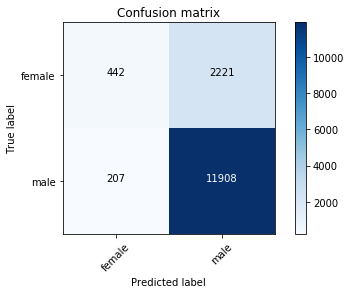

CPU times: user 12min 13s, sys: 3.02 s, total: 12min 16s
Wall time: 32.5 s


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=24,
       min_child_weight=0.9, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0.6, reg_lambda=1,
       scale_pos_weight=0.9, seed=0, silent=True, subsample=1)

In [11]:
%%time
impliment(XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6))

0.835701718771
Confusion matrix, without normalization
[[  442  2221]
 [  207 11908]]


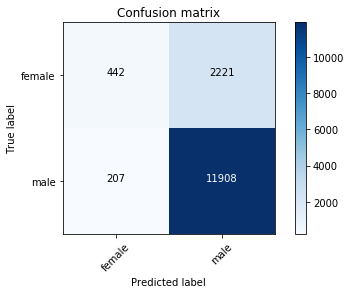

CPU times: user 30min 49s, sys: 2.36 s, total: 30min 52s
Wall time: 1min 22s


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=24,
       min_child_weight=0.9, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0.6, reg_lambda=1,
       scale_pos_weight=0.9, seed=0, silent=True, subsample=1)

In [92]:
%%time
impliment(XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6))

0.737515225335
Confusion matrix, without normalization
[[  715  1948]
 [ 1931 10184]]


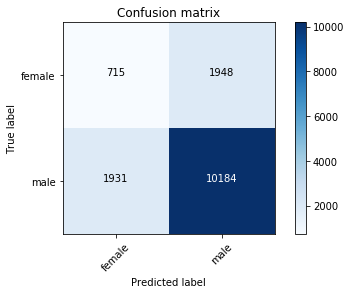

CPU times: user 416 ms, sys: 150 ms, total: 566 ms
Wall time: 432 ms


ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')

In [54]:
%%time
impliment(ExtraTreeClassifier())

0.83177696576
Confusion matrix, without normalization
[[  231  2432]
 [   54 12061]]


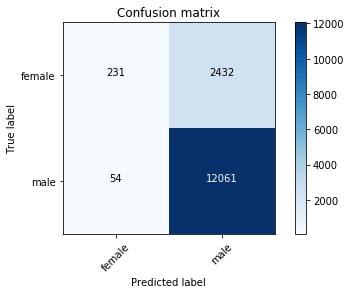

CPU times: user 44.5 s, sys: 294 ms, total: 44.8 s
Wall time: 2.93 s


ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [63]:
%%time
impliment(ExtraTreesClassifier(n_jobs=-1, bootstrap=True, n_estimators=100))

0.82724319935
Confusion matrix, without normalization
[[  208  2455]
 [   98 12017]]


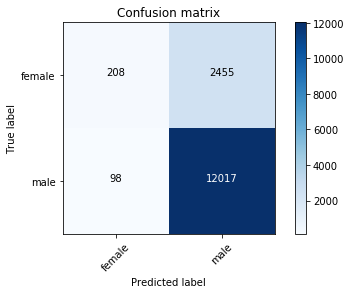

CPU times: user 4min 31s, sys: 204 ms, total: 4min 31s
Wall time: 4min 31s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [50]:
%%time
impliment(GradientBoostingClassifier(n_estimators=300))

0.825822168088
Confusion matrix, without normalization
[[  156  2507]
 [   67 12048]]


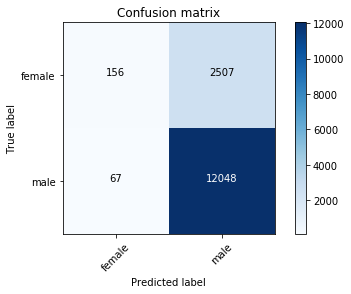

CPU times: user 1min 33s, sys: 201 ms, total: 1min 33s
Wall time: 1min 33s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [49]:
%%time
impliment(GradientBoostingClassifier(n_estimators=100))

0.835837055082
Confusion matrix, without normalization
[[  423  2240]
 [  186 11929]]


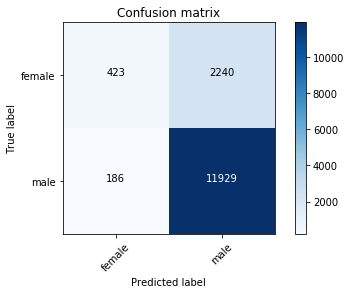

CPU times: user 13.3 s, sys: 3.84 s, total: 17.1 s
Wall time: 4min 32s


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=600, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [45]:
%%time
impliment(BaggingClassifier(n_jobs=-1, n_estimators=600))

0.834822032751
Confusion matrix, without normalization
[[  429  2234]
 [  207 11908]]


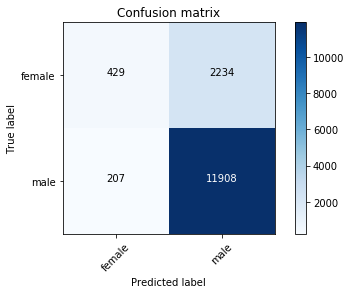

CPU times: user 12.5 s, sys: 3.38 s, total: 15.9 s
Wall time: 1min 39s


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=200, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [41]:
%%time
impliment(BaggingClassifier(n_jobs=-1, n_estimators=200))

0.833265665178
Confusion matrix, without normalization
[[  427  2236]
 [  228 11887]]


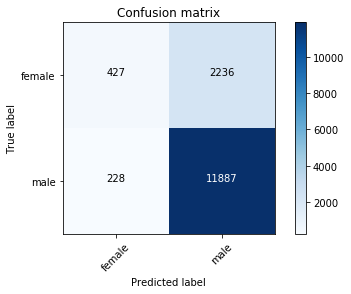

CPU times: user 12.4 s, sys: 3.24 s, total: 15.6 s
Wall time: 58.3 s


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [40]:
%%time
impliment(BaggingClassifier(n_jobs=-1, n_estimators=100))

0.814724590608
Confusion matrix, without normalization
[[  571  2092]
 [  646 11469]]


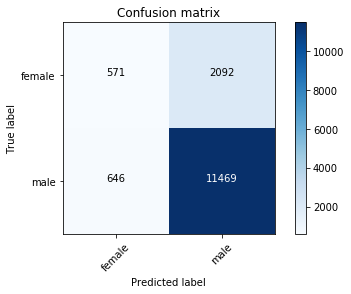

CPU times: user 52.3 s, sys: 900 ms, total: 53.2 s
Wall time: 53.1 s


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [36]:
%%time
impliment(BaggingClassifier())

0.819732034105
Confusion matrix, without normalization
[[   37  2626]
 [   38 12077]]


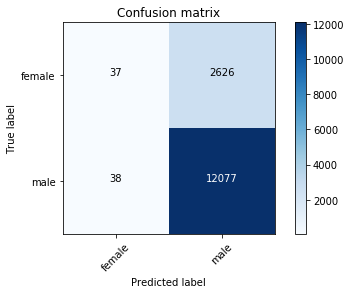

CPU times: user 38min 46s, sys: 151 ms, total: 38min 47s
Wall time: 1min 43s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
           weights='uniform')

In [35]:
%%time
impliment(KNeighborsClassifier(n_neighbors=20, n_jobs=-1))

0.822980105562
Confusion matrix, without normalization
[[  130  2533]
 [   83 12032]]


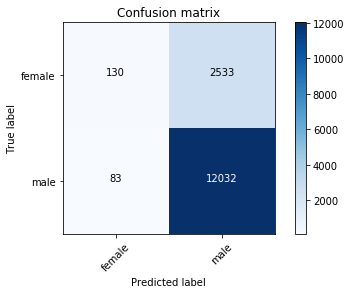

CPU times: user 15.3 s, sys: 150 ms, total: 15.5 s
Wall time: 15.3 s


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [33]:
%%time
impliment(AdaBoostClassifier())

0.822641764785
Confusion matrix, without normalization
[[  205  2458]
 [  163 11952]]


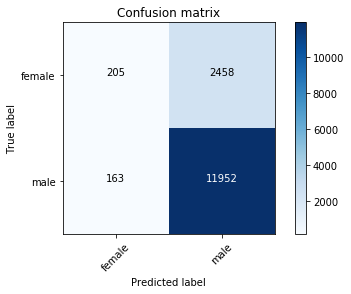

CPU times: user 1min, sys: 128 ms, total: 1min
Wall time: 1min


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=None)

In [32]:
%%time
impliment(AdaBoostClassifier(n_estimators=200))

0.740492624171
Confusion matrix, without normalization
[[  753  1910]
 [ 1925 10190]]


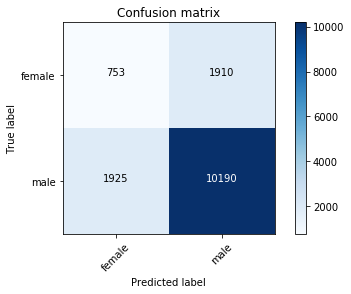

CPU times: user 7.15 s, sys: 137 ms, total: 7.29 s
Wall time: 7.15 s


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
%%time
impliment(DecisionTreeClassifier())

0.820341047503
Confusion matrix, without normalization
[[  126  2537]
 [  118 11997]]


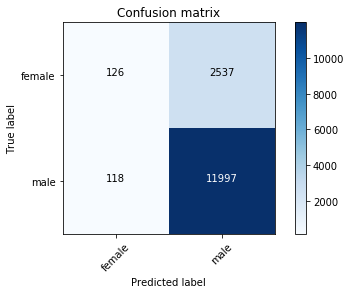

CPU times: user 1.08 s, sys: 2.73 s, total: 3.81 s
Wall time: 19.2 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
%%time
impliment(LogisticRegression(solver='lbfgs', n_jobs=-1))

0.79117607254
Confusion matrix, without normalization
[[  703  1960]
 [ 1126 10989]]


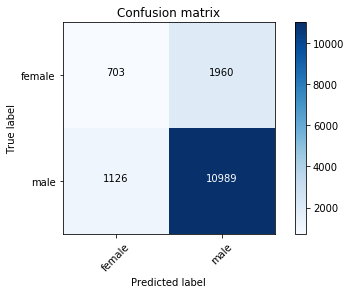

CPU times: user 1.08 s, sys: 377 ms, total: 1.46 s
Wall time: 592 ms


In [104]:
%%time
y_pred = classifier.predict(X_test)
y_pred = (y_pred> 0.5)

print accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['female','male'])